In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows

from CoolProp.HumidAirProp import HAPropsSI
from plot_id import *

plt.rcParams["font.family"] = "Liberation Sans"


In [2]:
path='~/Documents/greenair/python/climate/data/'
#file='Ханты-Мансийск.xlsx'
file='Якутск.xlsx'
df = pd.read_excel(path+file, skiprows = 6)
title = re.sub('Местное время', 'Погода',df.columns[0])


In [3]:
df['date_time']=pd.to_datetime(df.iloc[:,0], format='%d.%m.%Y %H:%M')
df = df.set_index(pd.DatetimeIndex(df['date_time']))
df = df.drop(['date_time'], axis=1)
df.sort_index(inplace=True)
df['hour'] = df.index.hour
df['dayofyear'] = df.index.dayofyear
df['year'] = df.index.year
df['duration']=df.index.to_series().diff()

In [23]:
df

,Местное время в Якутске / им. Платона Ойунского (аэропорт),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,hour,dayofyear,year,duration,d,h,Mode
date_time,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,01.01.2013 00:00,-41.0,754.7,768.9,65.0,"Ветер, дующий с западо-северо-запада",1.0,NaN,Дымка,NaN,Сплошная (100%) 6000 м,1,-45.0,0,1,2013,NaT,0.000046,-41.117049,Нагрев
2013-01-01 01:00:00,01.01.2013 01:00,-41.0,754.7,768.9,58.0,"Ветер, дующий с западо-северо-запада",1.0,NaN,Дымка,NaN,Сплошная (100%) 6000 м,5,-46.0,1,1,2013,01:00:00,0.000041,-41.129056,Нагрев
2013-01-01 02:00:00,01.01.2013 02:00,-42.0,753.8,768.1,64.0,"Штиль, безветрие",0.0,NaN,Дымка,NaN,Сплошная (100%) 6000 м,5,-46.0,2,1,2013,01:00:00,0.000040,-42.136436,Нагрев
2013-01-01 03:00:00,01.01.2013 03:00,-42.0,753.8,768.1,57.0,"Штиль, безветрие",0.0,NaN,Дымка,NaN,Сплошная (100%) 6000 м,1,-47.0,3,1,2013,01:00:00,0.000036,-42.147135,Нагрев
2013-01-01 04:00:00,01.01.2013 04:00,-42.0,753.8,768.1,64.0,"Штиль, безветрие",0.0,NaN,Дымка,NaN,Сплошная (100%) 6000 м,1,-46.0,4,1,2013,01:00:00,0.000040,-42.136436,Нагрев
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00,31.12.2018 21:30,-33.0,756.6,770.4,67.0,"Ветер, дующий с востоко-юго-востока",1.0,NaN,NaN,NaN,Нет существенной облачности,10.0 и более,-37.0,21,365,2018,00:30:00,0.000115,-32.903989,Нагрев
2018-12-31 22:00:00,31.12.2018 22:00,-33.0,756.6,770.4,74.0,"Ветер, дующий с юго-востока",2.0,NaN,NaN,NaN,Нет существенной облачности,10.0 и более,-36.0,22,365,2018,00:30:00,0.000127,-32.874793,Нагрев
2018-12-31 22:30:00,31.12.2018 22:30,-32.0,756.7,770.4,67.0,"Ветер, дующий с юго-юго-востока",2.0,NaN,NaN,NaN,Нет существенной облачности,10.0 и более,-36.0,22,365,2018,00:30:00,0.000127,-31.866865,Нагрев


In [5]:
d = []
h = []
for index, row in df.iterrows():
        try:
                W = HAPropsSI('W','T',row['T']+273.15,'P',101325,'R',row['U']/100)
        except:
                W = np.nan
        try:
                enthalpy = HAPropsSI('H','T',row['T']+273.15,'P',101325,'R',row['U']/100)/1000
        except:
                enthalpy = np.nan
        
        d.append(W)
        h.append(enthalpy)
        
df['d'] = d
df['h'] = h


In [6]:
ds_dur_by_years= df['duration'].groupby(df.index.year).sum()
full_years_list = ds_dur_by_years.index [ds_dur_by_years > np.timedelta64(360,'D')].to_list()
full_years_quantity = len(full_years_list)
print (f'(Замеры за года {full_years_list}\nЗамеры за {full_years_quantity} лет')

(Замеры за года [2013, 2014, 2015, 2016, 2017, 2018]
Замеры за 6 лет


        num_hours
T                
-50.0   34.166667
-45.0  186.500000
-40.0  214.333333
-35.0  223.833333
-30.0  218.500000
-25.0  166.166667
-20.0  106.500000
-15.0   95.500000
-10.0  113.500000
-5.0   152.333333
-0.0   216.166667
 5.0   233.666667
 10.0  300.666667
 15.0  348.500000
 20.0  252.833333
 25.0  122.333333
 30.0   28.500000
 35.0    0.333333


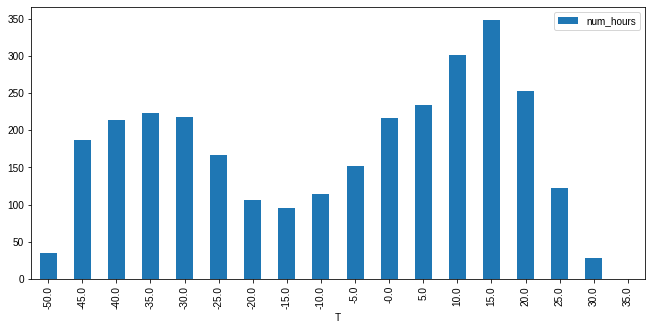

In [9]:
def myround(x, base=5):
    return base * np.round(x/base)
df_hours_by_temp=df['duration'].groupby(myround(df['T'])).agg(num_hours=('duration', lambda x: (np.sum(x.dt.components['hours']))/full_years_quantity) )
fig, ax = plt.subplots() 
fig.set_size_inches(11, 5)
df_hours_by_temp.plot(kind="bar", ax=ax)

print(df_hours_by_temp)

            num_hours
year T               
2013 -50.0      124.0
     -45.0      406.0
     -40.0      570.0
     -35.0      650.0
     -30.0      654.0
...               ...
2018  15.0       13.0
      20.0        9.0
      25.0        6.0
      30.0        1.0
      35.0        0.0

[105 rows x 1 columns]


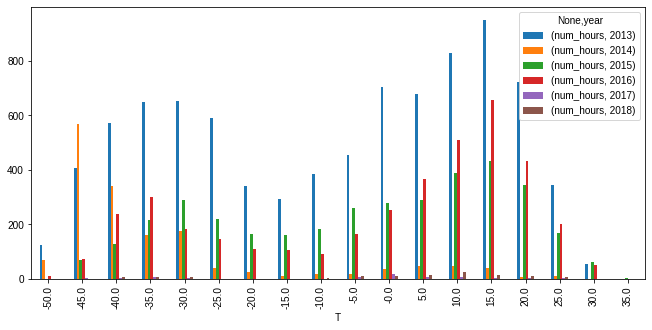

In [10]:
def myround(x, base=5):
    return base * np.round(x/base)
df_hours_by_temp=df['duration'].groupby([df['year'], myround(df['T'])]).agg(num_hours=('duration', lambda x: (np.sum(x.dt.components['hours']))) )
fig, ax = plt.subplots() 
fig.set_size_inches(11, 5)
df_hours_by_temp.unstack(level=0).plot(kind='bar', subplots=False, ax=ax)
print(df_hours_by_temp)

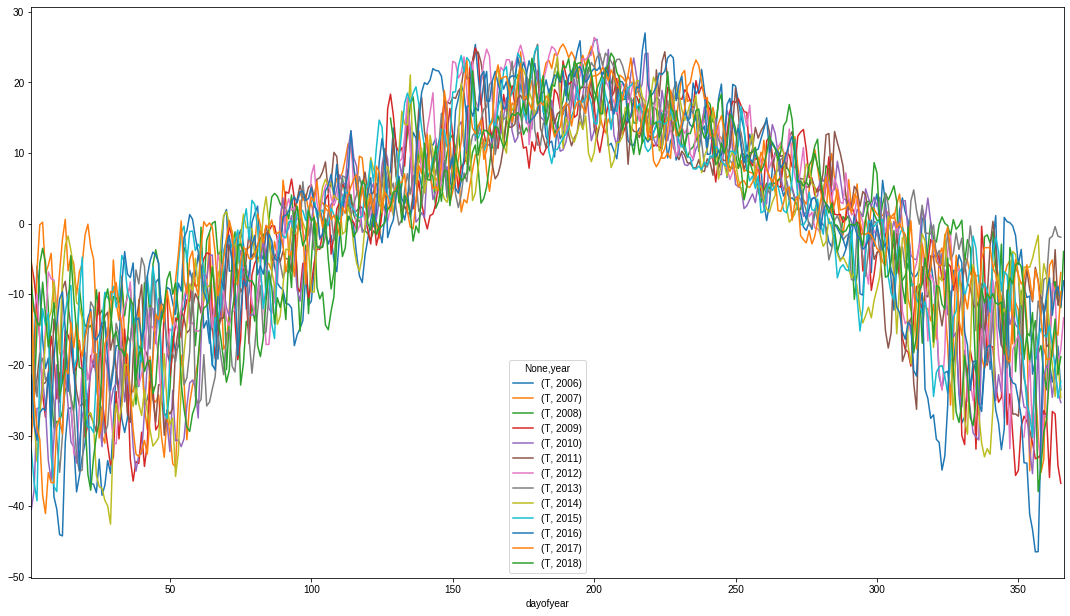

In [115]:
df_T_by_day = pd.pivot_table(df, index=['dayofyear'],columns=['year'], values=['T' ])

fig, ax = plt.subplots() 
fig.set_size_inches(18.5, 10.5)
df_T_by_day.plot(ax=ax)

In [56]:
df.describe()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,Td,tR,Tg,hour,dayofyear,year,duration,d,h
count,38038.000000,38036.000000,38041.000000,17272.000000,37929.000000,38070.000000,593.000000,2148.000000,5021.000000,7133.000000,38047.000000,9322.000000,189.000000,38156.000000,38156.000000,38156.000000,38155,37928.000000,37928.000000
mean,-0.602282,756.635390,761.057467,-0.002461,76.775686,1.971920,11.443508,11.639199,-4.640689,3.082546,-4.614020,11.997533,2.148148,12.506919,181.798171,2012.021465,0 days 02:59:11.314375,0.003944,9.344641
std,14.953803,8.911461,9.067303,1.058805,15.912259,1.268732,1.532507,1.757197,14.423397,15.511845,13.881543,0.136999,4.998857,6.869606,105.900659,3.725721,0 days 00:26:30.250159,0.003345,22.825205
min,-48.000000,718.100000,722.100000,-13.200000,10.000000,0.000000,10.000000,10.000000,-47.800000,-44.500000,-50.700000,1.000000,-22.000000,0.000000,1.000000,2006.000000,0 days 00:00:00,0.000023,-48.214288
25%,-10.800000,750.800000,755.100000,-0.600000,68.000000,1.000000,10.000000,10.000000,-14.700000,-7.700000,-13.600000,12.000000,0.000000,8.000000,89.000000,2009.000000,0 days 03:00:00,0.001195,-7.837931
50%,0.700000,756.000000,760.400000,0.000000,80.000000,2.000000,11.000000,11.000000,-2.300000,4.300000,-2.900000,12.000000,2.000000,14.000000,182.000000,2012.000000,0 days 03:00:00,0.003036,8.970747
75%,11.200000,761.900000,766.400000,0.600000,89.000000,3.000000,12.000000,13.000000,7.000000,15.300000,6.500000,12.000000,4.000000,17.750000,274.000000,2015.000000,0 days 03:00:00,0.006011,26.711877
max,32.600000,793.600000,815.600000,11.100000,100.000000,22.000000,21.000000,24.000000,22.200000,33.000000,25.000000,12.000000,15.000000,23.000000,366.000000,2018.000000,1 days 15:00:00,0.020314,81.876771


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62f59eb9b0>,
      dtype=object)

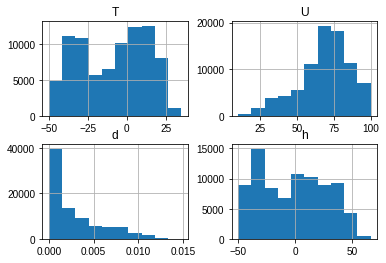

In [11]:
df.hist(['T','U','d','h'])

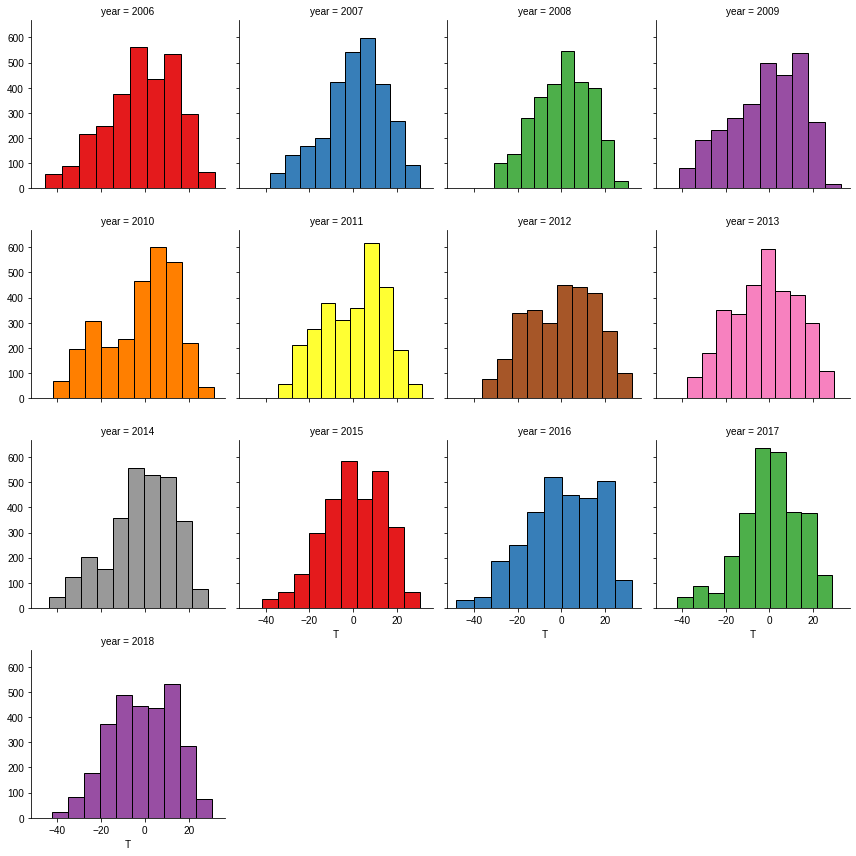

In [66]:
g = sns.FacetGrid(df, col="year", hue="year", palette="Set1", col_wrap=4)
g.map(plt.hist, 'T', ec="k")

In [12]:
title = re.sub('Местное время', 'Погода',df.columns[0])

**Осушение**

In [32]:
t_target  = 21 #degC
rh_target = 60 #%
l_nom     = 2800 #m3/h
ro        = 1.2 #kg/m3
d_drying = HAPropsSI('W','T',t_target+273.15,'P',101325,'R',rh_target/100)
h_drying = HAPropsSI('H','W',d_drying,'P',101325,'R',98/100)/1000
print(f'Требуемая абсолютная влажность {d_drying} кг/кг')

Требуемая абсолютная влажность 0.009339965680838988 кг/кг


In [14]:
df.loc[:,'Mode']='Нагрев'
df.loc[(df['T']>17),'Mode']='Охлаждение нерабочее'
df.loc[(df['hour']>8)&(df['hour']<19)&(df['T']>17),'Mode']='Охлаждение рабочее'

In [20]:
df.loc[:,'Mode']='Нагрев'
df.loc[(df['d']>=d_drying),'Mode']='Осушение'
df.loc[(df['d']<d_drying)&(df['T']>17),'Mode']='Охлаждение нерабочее'
df.loc[(df['d']<d_drying)&(df['hour']>8)&(df['hour']<19)&(df['T']>17),'Mode']='Охлаждение рабочее'

Text(0.5, 1.0, 'Погода в Якутске / им. Платона Ойунского (аэропорт)')

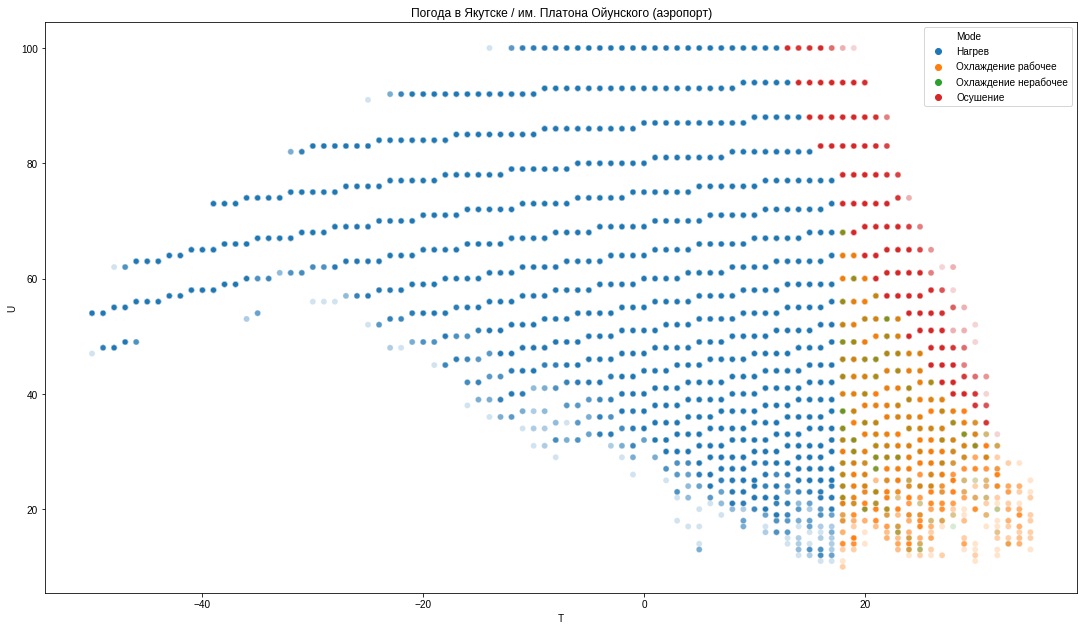

In [21]:
fig, ax = plt.subplots() 
fig.set_size_inches(18.5, 10.5)
sns.scatterplot(y='U',x='T', hue= 'Mode', data=df, alpha=0.2, ax=ax)
ax = plt.gca()
ax.set_title(title)


In [16]:
piv_Td = df.groupby(['T',np.round(df['d'], 4)]).agg(num_hours=('duration', lambda x: (np.sum(x.dt.components['hours'])/full_years_quantity)))


In [17]:
piv_Td.unstack()

num_hours                                                          \
d         0.0000 0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008   
T                                                                          
-50.0   0.833333    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-49.0   9.166667    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-48.0  24.166667    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-47.0  34.833333    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-46.0  37.000000    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
 31.0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 32.0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 33.0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 34.0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 35.0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

              ...                                                             \
d     0.0009  ... 0.0121    0.0122 0.0123 0.0129 0.0130 0.0131 0.0138 0.0139   
T             ...                                                              
-50.0    NaN  ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-49.0    NaN  ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-48.0    NaN  ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-47.0    NaN  ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-46.0    NaN  ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...  ...    ...       ...    ...    ...    ...    ...    ...    ...   
 31.0    NaN  ...    NaN  0.166667    NaN    NaN    NaN    NaN    NaN    NaN   
 32.0    NaN  ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 33.0    NaN  ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 34.0    NaN  ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 35.0    NaN  ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                     
d     0.0147 0.0148  
T                    
-50.0    NaN    NaN  
-49.0    NaN    NaN  
-48.0    NaN    NaN  
-47.0    NaN    NaN  
-46.0    NaN    NaN  
...      ...    ...  
 31.0    NaN    NaN  
 32.0    NaN    NaN  
 33.0    NaN    NaN  
 34.0    NaN    NaN  
 35.0    NaN    NaN  

[86 rows x 105 columns]

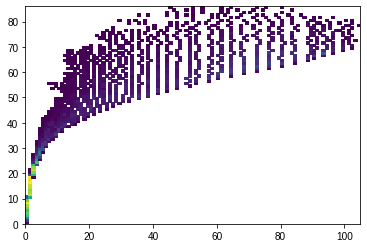

In [18]:
plt.pcolormesh(piv_Td.unstack())

-16
-14
-12
-10
-8
-6
-4
-2
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32


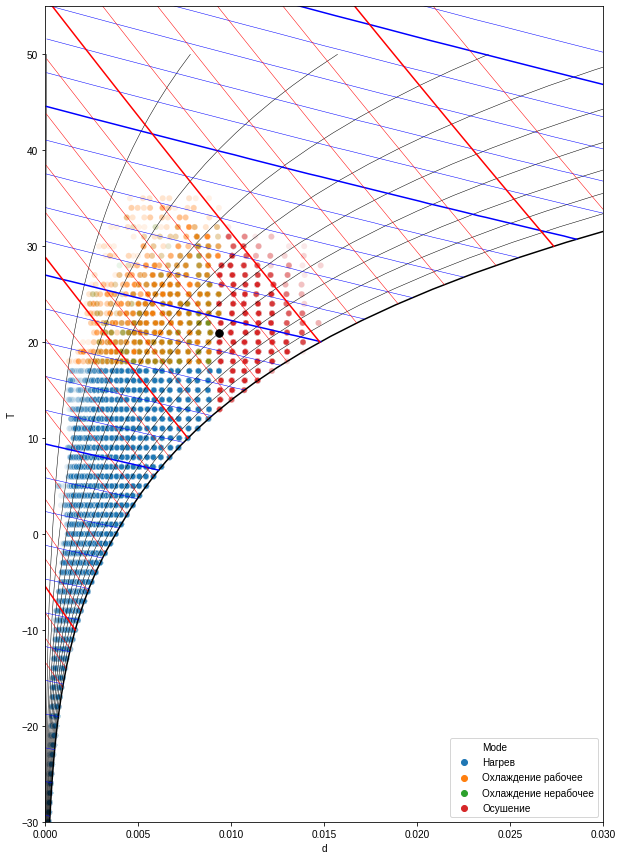

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 15)
plot_id (ax)
sns.scatterplot(x='d', y='T', hue='Mode', marker = 'o', alpha = 0.1, data=df, ax=ax)
#ax.hexbin(x='d', y='T', data=df,  bins=None)
plt.plot([d_drying], [t_target], 'k.', markersize=15.0)
plt.show()

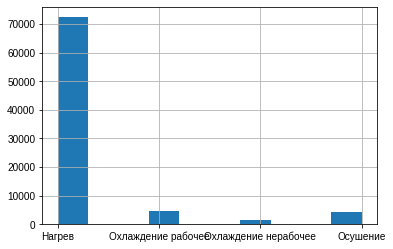

In [28]:
df['Mode'].hist()

In [29]:
def cooling_dry_cap_calc(row):
    if row['Mode'] == 'Осушение':
        cool_cap = l_nom/3600*ro*(row['h']-h_drying)
    else:
        cool_cap = 0
    return cool_cap

df['cooling_dry_cap']= df.apply(cooling_dry_cap_calc, axis = 1)


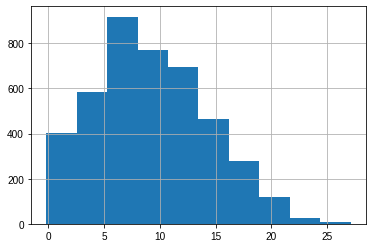

In [30]:
df.loc[df['Mode'] == 'Осушение','cooling_dry_cap'].hist()

Отбрасываем 3% максимальных мощностей и находим максимальную требуемую мощность охладителя, кВт

In [31]:
dryig_periods = df.loc[df['Mode'] == 'Осушение','cooling_dry_cap'].count()
df.loc[df['Mode'] == 'Осушение','cooling_dry_cap'].nlargest(int(dryig_periods*0.03), keep='all').min()

19.1270212679366

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62e8567d30>,
      dtype=object)

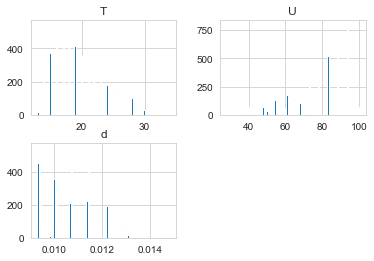

In [50]:
df.loc[(df['d']>0.00933) ,[df.columns[0],'T','U','d']].hist(bins=100)

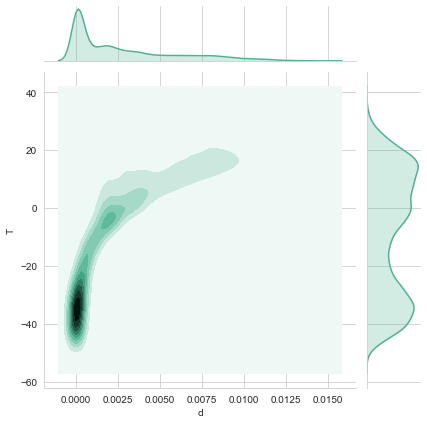

In [51]:
sns.set_style('whitegrid')
sns.jointplot(x='d', y='T', data=df, kind="kde", color="#4CB391")